## EDA Notebook

<a id="top"></a>
Jump to
- [Weather Data](#eda_weather_data)
- [Satellite Hotspot Data](#eda_hotspot_data)

#### Load request modules

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import re

#### Load data

In [6]:
env_df = pd.read_parquet('../data/processed/combine_data-20240911_20241211.parquet')
hotspot_df = pd.read_parquet('../data/processed/sat_hotspot-20240911_20241211.parquet')

<a id='eda_weather_data'></a>
#### EDA Weather Data
[Top](#top)

In [8]:
# show sample rows
env_df.head()

,date,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,pressure_msl,surface_pressure,wind_speed_10m,wind_speed_80m,...,temperature_120m,temperature_180m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index
0,2024-09-11 11:00:00+00:00,13.3,97.10,27.75,85.0,24.996260,1007.6,1007.6,20.172853,22.768396,...,26.1,25.3,28.8,14.3,107.0,0.1,0.1,44.0,4.0,0.05
1,2024-09-11 11:00:00+00:00,13.3,97.25,27.55,87.0,25.190360,1007.6,1007.6,19.083395,20.883102,...,25.8,25.0,28.8,14.3,107.0,0.1,0.1,44.0,4.0,0.05
2,2024-09-11 11:00:00+00:00,13.3,97.40,27.45,87.0,25.092102,1007.7,1007.7,18.374111,20.172853,...,25.8,24.9,29.1,14.5,106.0,0.1,0.1,44.0,4.0,0.05
3,2024-09-11 11:00:00+00:00,13.3,97.55,27.45,88.0,25.284054,1007.7,1007.7,17.786331,19.586119,...,25.7,24.9,29.1,14.5,106.0,0.1,0.1,44.0,4.0,0.05
4,2024-09-11 11:00:00+00:00,13.3,97.70,27.40,88.0,25.234846,1007.7,1007.7,16.489416,17.786331,...,25.7,24.8,29.1,14.5,106.0,0.1,0.1,44.0,4.0,0.05


In [9]:
# show number of rows and columns
env_df.shape

(5978160, 27)

In [10]:
# show columns name and data type
env_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5978160 entries, 0 to 5978159
Data columns (total 27 columns):
 #   Column                Dtype              
---  ------                -----              
 0   date                  datetime64[ns, UTC]
 1   latitude              float64            
 2   longitude             float64            
 3   temperature_2m        float64            
 4   relative_humidity_2m  float64            
 5   dew_point_2m          float64            
 6   pressure_msl          float64            
 7   surface_pressure      float64            
 8   wind_speed_10m        float64            
 9   wind_speed_80m        float64            
 10  wind_speed_120m       float64            
 11  wind_speed_180m       float64            
 12  wind_direction_10m    float64            
 13  wind_direction_80m    float64            
 14  wind_direction_120m   float64            
 15  wind_direction_180m   float64            
 16  temperature_80m       float64       

In [11]:
# check for column with null value
env_df.columns[env_df.isnull().sum() > 0]

Index([], dtype='object')

In [12]:
# review summary statistics
env_df.describe()

,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,pressure_msl,surface_pressure,wind_speed_10m,wind_speed_80m,wind_speed_120m,...,temperature_120m,temperature_180m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index
count,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,...,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06,5.978160e+06
mean,1.682500e+01,1.013000e+02,2.543828e+01,7.870160e+01,2.116328e+01,1.010787e+03,9.692751e+02,5.354824e+00,8.898671e+00,1.016833e+01,...,2.501891e+01,2.445231e+01,1.582390e+01,1.182449e+01,2.650890e+02,3.806469e+00,3.625339e+00,6.482472e+01,1.668592e-01,1.574484e+00
std,2.078010e+00,2.467793e+00,3.914452e+00,1.392621e+01,3.256417e+00,3.523304e+00,3.929012e+01,3.653470e+00,6.092873e+00,7.340659e+00,...,3.205737e+00,3.136159e+00,1.136449e+01,8.122526e+00,1.179247e+02,6.276263e+00,4.631717e+00,3.209160e+01,1.006461e+00,2.563827e+00
min,1.330000e+01,9.710000e+01,3.910999e+00,1.500000e+01,-3.867266e+00,9.971000e+02,7.851310e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,5.261000e+00,4.761000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.506250e+01,9.920000e+01,2.295450e+01,6.900000e+01,1.903418e+01,1.008700e+03,9.468119e+02,2.880000e+00,4.379589e+00,4.735060e+00,...,2.314550e+01,2.264900e+01,8.800000e+00,6.800000e+00,1.990000e+02,6.000000e-01,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.682500e+01,1.013000e+02,2.556500e+01,8.200000e+01,2.152429e+01,1.011000e+03,9.850799e+02,4.349896e+00,7.289445e+00,8.145870e+00,...,2.534450e+01,2.480450e+01,1.340000e+01,1.020000e+01,2.470000e+02,1.600000e+00,2.100000e+00,6.100000e+01,0.000000e+00,0.000000e+00
75%,1.858750e+01,1.034000e+02,2.824250e+01,9.000000e+01,2.386312e+01,1.013000e+03,9.979461e+02,6.915374e+00,1.192356e+01,1.368473e+01,...,2.728450e+01,2.666100e+01,1.990000e+01,1.480000e+01,3.040000e+02,4.400000e+00,4.400000e+00,8.700000e+01,0.000000e+00,2.400000e+00
max,2.035000e+01,1.055000e+02,3.683200e+01,1.000000e+02,2.812651e+01,1.026600e+03,1.024740e+03,4.014121e+01,5.305086e+01,5.804826e+01,...,3.393150e+01,3.321050e+01,2.682000e+02,1.877000e+02,1.020900e+04,1.336000e+02,7.300000e+01,4.900000e+02,3.500000e+01,1.245000e+01


##### Visualize weather variable distributions by category

In [14]:
# sampling data from central coordinates to focus on individual trends, 
# given the large number of coordinates with varying patterns

center_lat = env_df.loc[len(env_df)//2,'latitude']
center_long = env_df.loc[len(env_df)//2,'longitude']
center_env_df = env_df[(env_df['latitude'] == center_lat) & \
       (env_df['longitude'] == center_long)]

In [15]:
# specific variable groups
groups = ['temperature','wind_speed','wind_direction','dew','pressure']

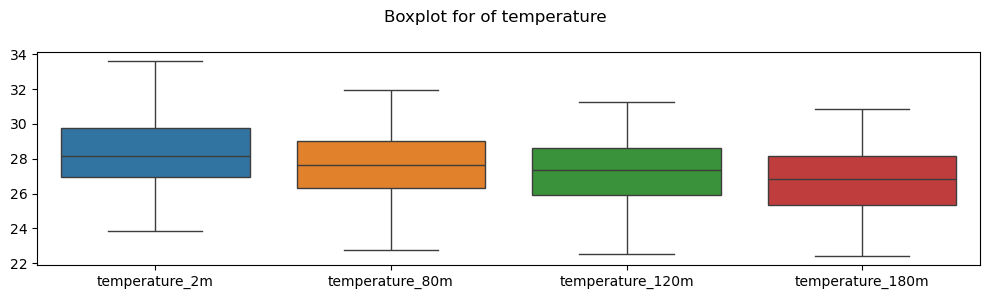

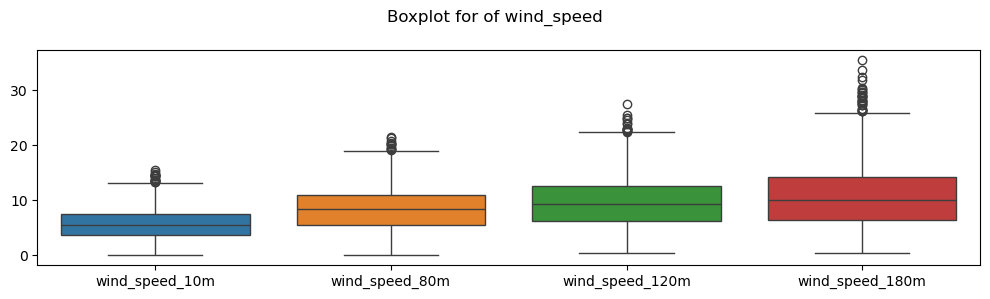

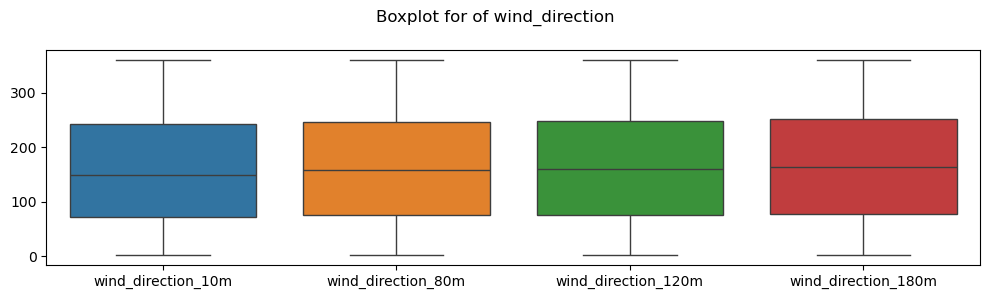

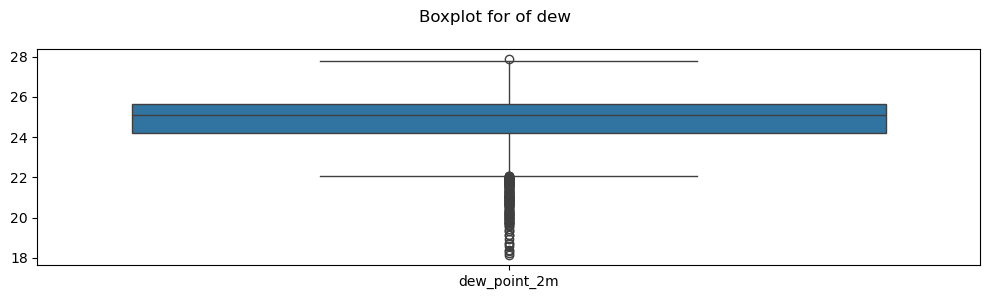

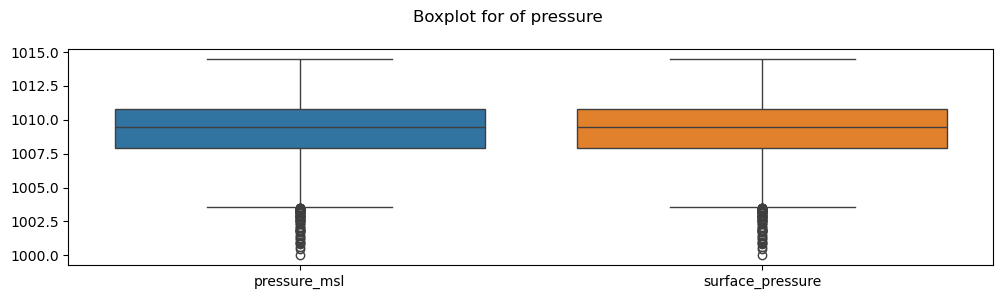

In [16]:
# show boxplot weather variables
for group in groups:
    plt.figure(figsize=(10,3))
    df = center_env_df[[col for col in center_env_df.columns if group in col or col=='date']]
    sns.boxplot(df)
    plt.suptitle(f'Boxplot for of {group}')
    plt.tight_layout()
    plt.show();

##### Visualize weather trends across categories

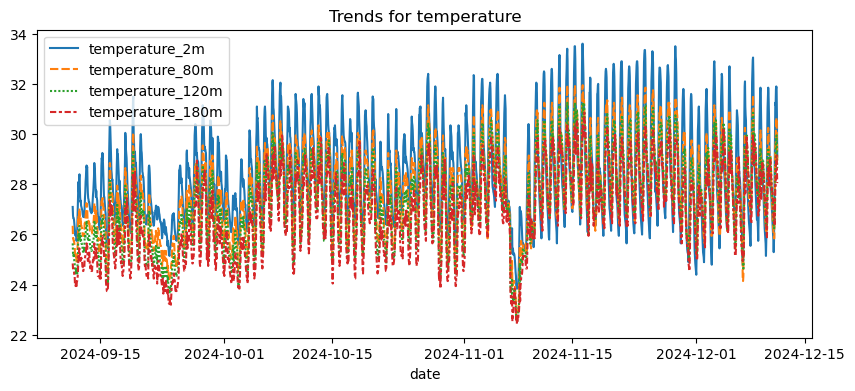

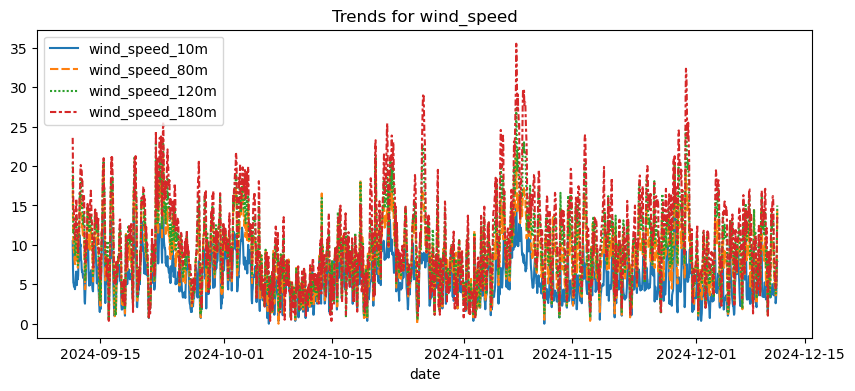

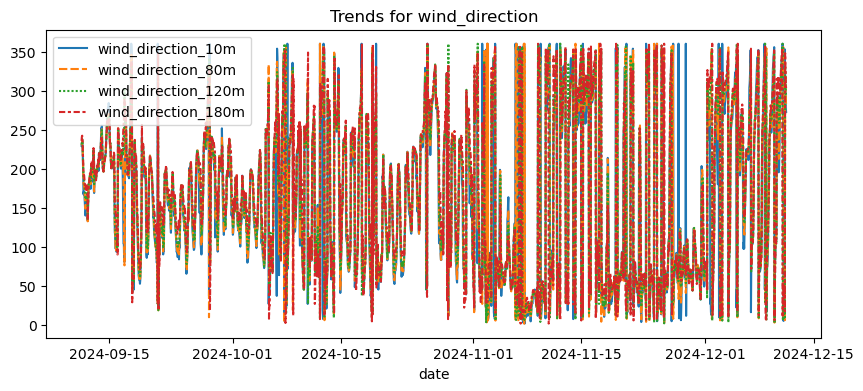

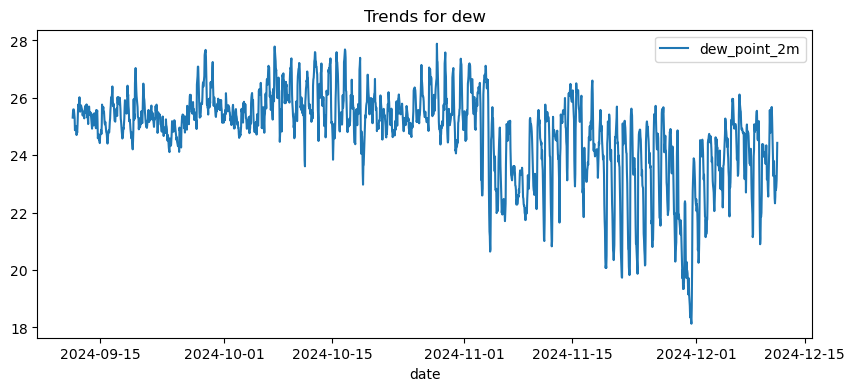

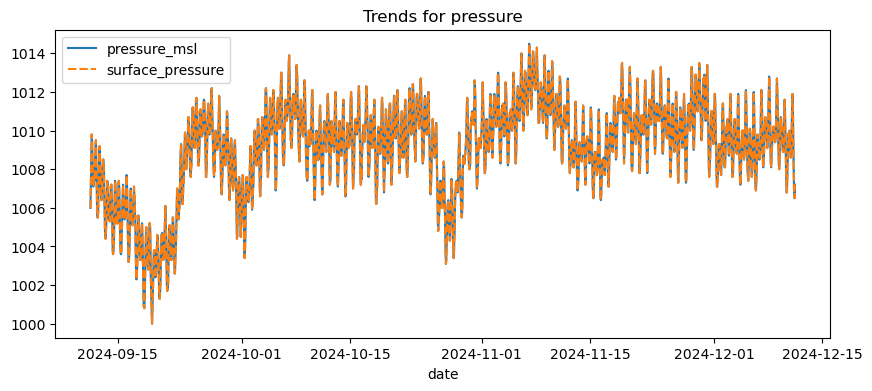

In [18]:
# plot value trends by group
for group in groups:
    plt.figure(figsize=(10,4))
    df = center_env_df[[col for col in center_env_df.columns if group in col or col=='date']]
    df.set_index('date', inplace=True)
    #print(group, df.columns)
    sns.lineplot(data=df)
    plt.title(f'Trends for {group}')
    plt.show()

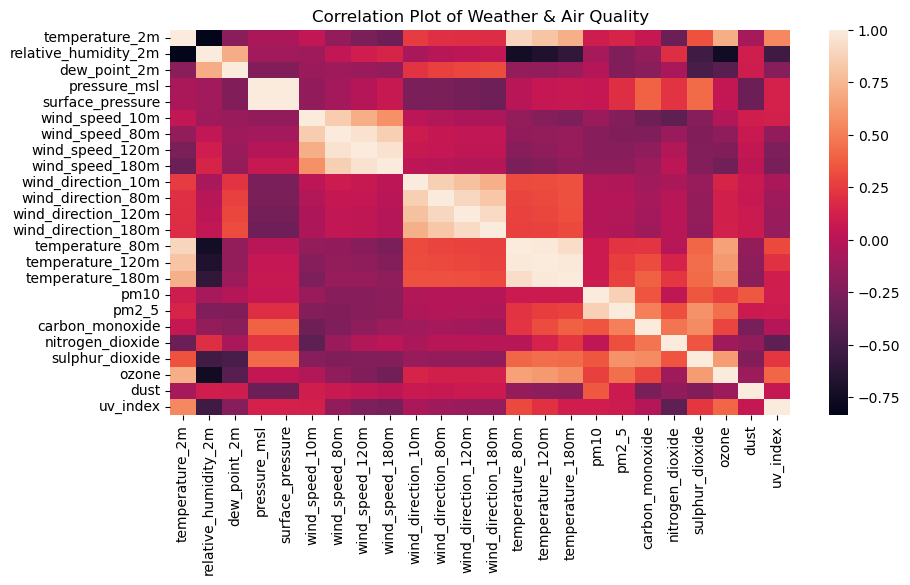

In [19]:
# plot correlation
plt.figure(figsize=(10,5))
sns.heatmap(center_env_df.iloc[:,3:].corr())
plt.title('Correlation Plot of Weather & Air Quality')
plt.show();

---

<a id='eda_hotspot_data'></a>
#### EDA Satellite Hotspot Data
[Top](#top)

In [22]:
# show sample rows
hotspot_df.head()

,latitude,longitude,brightness,scan,track,satellite,instrument,confidence,version,bright_t31,frp,daynight
date,,,,,,,,,,,,
2024-09-11 06:22:00+00:00,15.82359,100.37830,332.42,0.44,0.38,N20,VIIRS,n,2.0NRT,290.69,2.99,D
2024-09-11 06:22:00+00:00,15.03596,100.00519,344.36,0.46,0.39,N20,VIIRS,n,2.0NRT,290.53,15.53,D
2024-09-11 06:22:00+00:00,15.14845,100.74833,336.35,0.43,0.38,N20,VIIRS,n,2.0NRT,293.21,5.92,D
2024-09-11 06:22:00+00:00,15.02940,100.24738,333.30,0.45,0.39,N20,VIIRS,n,2.0NRT,291.12,4.36,D
2024-09-11 06:22:00+00:00,14.85628,100.03456,338.17,0.46,0.39,N20,VIIRS,n,2.0NRT,295.24,5.88,D


In [23]:
# show number of rows and columns
hotspot_df.shape

(17933, 12)

In [24]:
# show columns name and data type
hotspot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17933 entries, 2024-09-11 06:22:00+00:00 to 2024-12-11 18:23:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    17933 non-null  float64
 1   longitude   17933 non-null  float64
 2   brightness  17933 non-null  float64
 3   scan        17933 non-null  float64
 4   track       17933 non-null  float64
 5   satellite   17933 non-null  object 
 6   instrument  17933 non-null  object 
 7   confidence  17933 non-null  object 
 8   version     17933 non-null  object 
 9   bright_t31  17933 non-null  float64
 10  frp         17933 non-null  float64
 11  daynight    17933 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


In [25]:
# check for column with null value
hotspot_df.columns[hotspot_df.isnull().sum() > 0]

Index([], dtype='object')

In [26]:
hotspot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17933 entries, 2024-09-11 06:22:00+00:00 to 2024-12-11 18:23:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    17933 non-null  float64
 1   longitude   17933 non-null  float64
 2   brightness  17933 non-null  float64
 3   scan        17933 non-null  float64
 4   track       17933 non-null  float64
 5   satellite   17933 non-null  object 
 6   instrument  17933 non-null  object 
 7   confidence  17933 non-null  object 
 8   version     17933 non-null  object 
 9   bright_t31  17933 non-null  float64
 10  frp         17933 non-null  float64
 11  daynight    17933 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


In [27]:
# review summary statistics
hotspot_df.describe()

,latitude,longitude,brightness,scan,track,bright_t31,frp
count,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000,17933.000000
mean,16.254040,101.139411,330.963102,0.497936,0.491919,295.882576,4.757974
std,1.870434,1.582127,12.120692,0.248227,0.196425,5.570700,4.641885
min,5.644140,97.811070,294.700000,0.320000,0.360000,261.300000,0.100000
25%,15.103720,100.096020,328.820000,0.390000,0.370000,293.050000,2.450000
50%,16.225930,100.537510,332.820000,0.420000,0.410000,297.110000,3.710000
75%,17.390340,102.139400,337.530000,0.500000,0.540000,299.720000,5.660000
max,20.572390,105.763690,367.000000,3.970000,1.850000,310.770000,122.410000


In [28]:
groups = ['brigh', r'scan|track', 'frp']

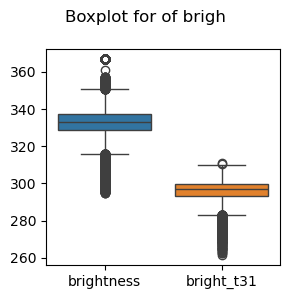

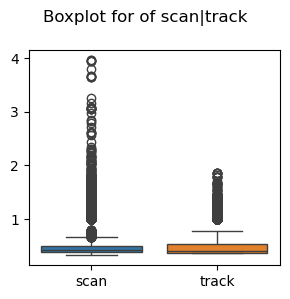

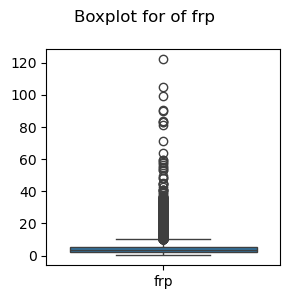

In [29]:
for group in groups:
    plt.figure(figsize=(3,3))
    df = hotspot_df[[col for col in hotspot_df.columns[2:] if re.search(group, col)]]
    sns.boxplot(df)
    plt.suptitle(f'Boxplot for of {group}')
    plt.tight_layout()
    plt.show();

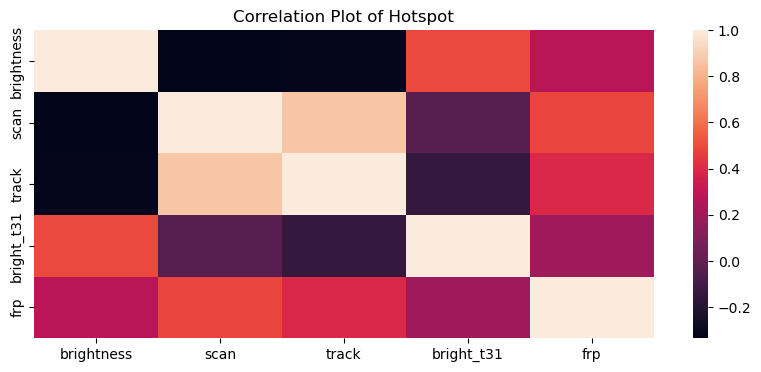

In [30]:
# plot correlation
plt.figure(figsize=(10,4))
sns.heatmap(hotspot_df[[col for col in hotspot_df.columns[2:] if re.search(r'brigh|scan|track|frp', col)]].corr())
plt.title('Correlation Plot of Hotspot')
plt.show();

---